In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # For numerical operations, for logarithmic transformation

In [32]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [33]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               6
Dependents           15
Education             9
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     21
Credit_History       50
Property_Area         9
Loan_Status           0
dtype: int64

C:\Users\tanay\AppData\Local\Temp\ipykernel_19768\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


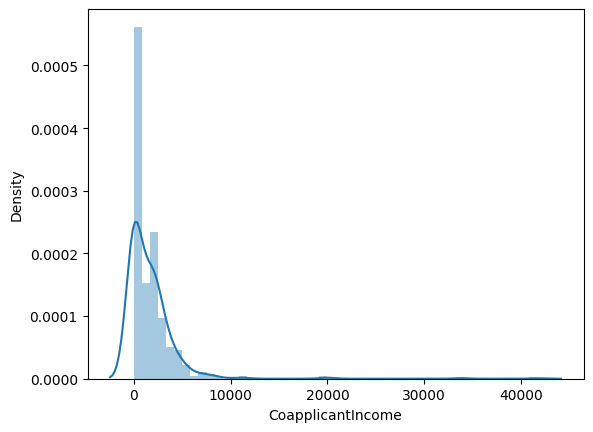

In [34]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [35]:
q1 = dataset["CoapplicantIncome"].quantile(0.25) # Calculate first quartile
q3 = dataset["CoapplicantIncome"].quantile(0.75) # Calculate third quartile
iqr = q3 - q1 # Calculate interquartile range

In [36]:
min_r = q1 - 1.5 * iqr # Calculate lower bound (min range)
max_r = q3 + 1.5 * iqr # Calculate upper bound (max range)
min_r, max_r

(np.float64(-3486.0), np.float64(5810.0))

In [37]:
dataset = dataset[dataset["CoapplicantIncome"] <= max_r] # Remove outliers and assign to the original dataset

C:\Users\tanay\AppData\Local\Temp\ipykernel_19768\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


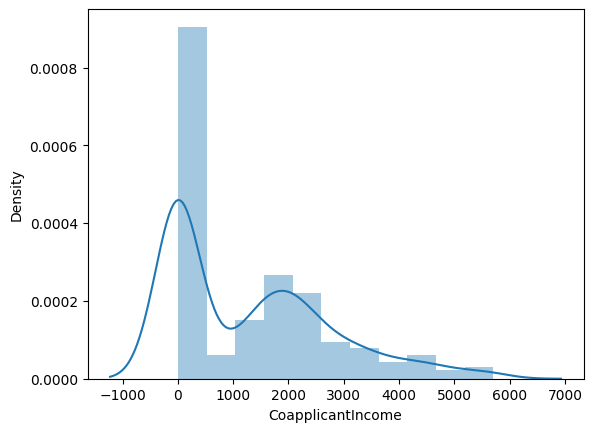

In [38]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

Now to perform Function Tranformation we will use sikitlearn library

In [39]:
from sklearn.preprocessing import FunctionTransformer

In [40]:
ft = FunctionTransformer(func = np.log1p) # Logarithmic transformation

In [41]:
ft.fit(dataset[["CoapplicantIncome"]]) # Fit the transformer to the data
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]]) # Transform the data

Now comparing the two graphs side by side:
CoapplicantIncome & CoapplicantIncome_tf(transformed data)

C:\Users\tanay\AppData\Local\Temp\ipykernel_19768\2228291324.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\tanay\AppData\Local\Temp\ipykernel_19768\2228291324.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


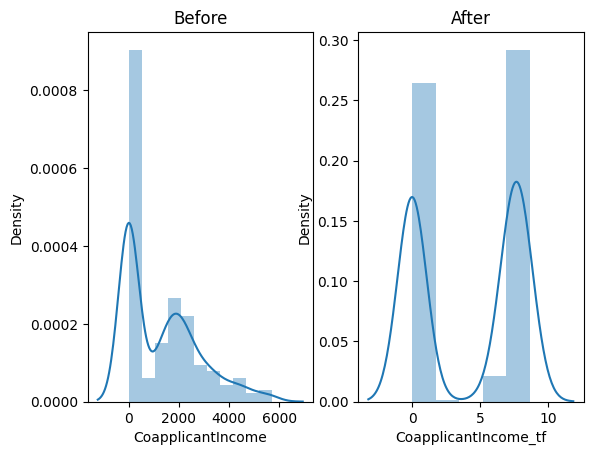

In [42]:
plt.Figure(figsize=(10, 4)) # Set the figure size for better visibility

plt.subplot(1, 2, 1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1, 2, 2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")

plt.show()